In [4]:
import pandas as pd

In [5]:
hr_df = pd.read_csv('./data/HR_comma_sep.csv')

In [6]:
hr_df.shape


(14999, 10)

In [7]:
hr_df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
import matplotlib.pyplot as plt


Text(0, 0.5, 'Left')

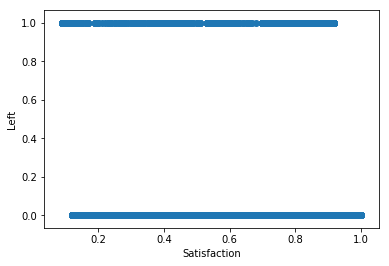

In [9]:
plt.scatter(hr_df.satisfaction_level, hr_df.left)
plt.xlabel('Satisfaction')
plt.ylabel('Left')

In [10]:
cols =['satisfaction_level', 'left']
hr_df_corr = hr_df[cols]

In [11]:
hr_df_corr.corr()


,satisfaction_level,left
satisfaction_level,1.000000,-0.388375
left,-0.388375,1.000000


In [12]:
import seaborn as sn

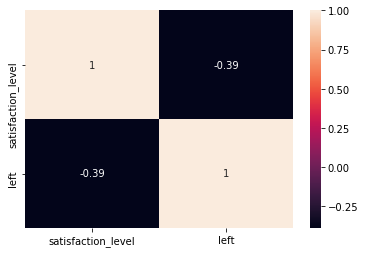

In [13]:
sn.heatmap(hr_df_corr.corr(), annot=True)

C:\Users\dhimate\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


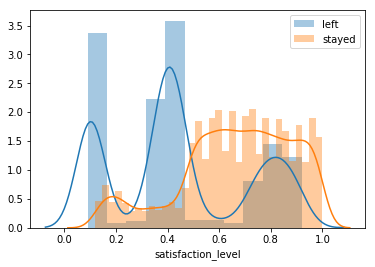

In [14]:
sn.distplot(hr_df[hr_df.left == 1] ['satisfaction_level'], label = 'left')
sn.distplot(hr_df[hr_df.left == 0] ['satisfaction_level'], label = 'stayed')
plt.legend()


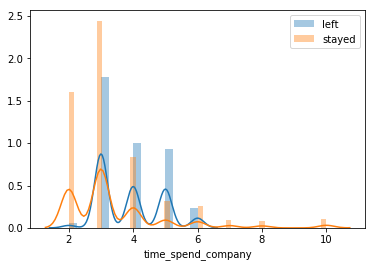

In [15]:
sn.distplot(hr_df[hr_df.left == 1] ['time_spend_company'], label = 'left')
sn.distplot(hr_df[hr_df.left == 0] ['time_spend_company'], label = 'stayed')
plt.legend()


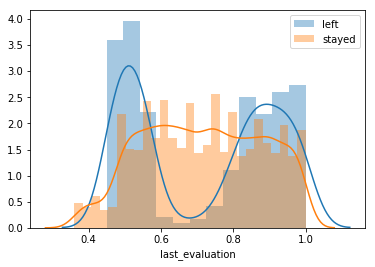

In [16]:
sn.distplot(hr_df[hr_df.left == 1] ['last_evaluation'], label = 'left')
sn.distplot(hr_df[hr_df.left == 0] ['last_evaluation'], label = 'stayed')
plt.legend()

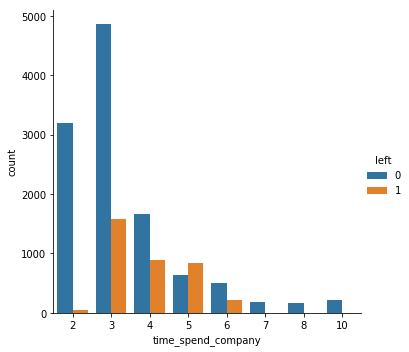

In [17]:
sn.catplot(data=hr_df,
          x='time_spend_company',
          kind='count',
          hue='left')

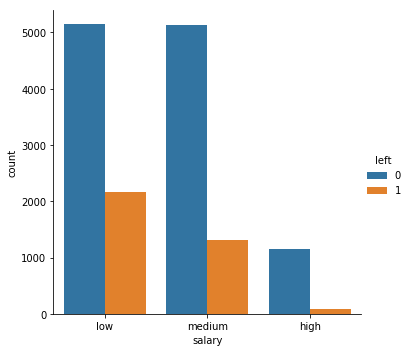

In [18]:
sn.catplot(data=hr_df,
          x='salary',
          kind='count',
          hue='left')

In [19]:
hr_df.sales.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [20]:
hr_df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

### Encoding categorical variables

In [21]:
hr_encoded_df = pd.get_dummies(hr_df, columns=['sales','salary'])

In [22]:
hr_encoded_df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [23]:
hr_encoded_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales_IT', 'sales_RandD', 'sales_accounting',
       'sales_hr', 'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

In [24]:
hr_encoded_df.columns.size

21

In [25]:
x_features = list(hr_encoded_df.columns)

In [26]:
x_features.remove('left')

### Splitting dataset

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test,\
y_train, y_test = train_test_split(hr_encoded_df[x_features],
                                  hr_encoded_df.left,
                                  train_size=0.8,
                                  random_state = 100)

C:\Users\dhimate\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [29]:
x_train.shape

(11999, 20)

In [30]:
x_test.shape

(3000, 20)

### Building KNN Model

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn_v1 = KNeighborsClassifier(n_neighbors=5)

In [33]:
knn_v1.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

### prefdict and evaluate the model

In [34]:
y_pred_knn_v1 = knn_v1.predict(x_test)

In [35]:
y_knn_v1 = pd.DataFrame({'actual': y_test,
                       'predicted' : y_pred_knn_v1})

In [36]:
y_knn_v1.sample(10, random_state = 34)


,actual,predicted
10145,0,0
113,1,1
3006,0,1
9682,0,1
13275,0,0
9803,0,1
12996,0,0
13353,0,1
5922,0,0
316,1,1


In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
cm_v1 = confusion_matrix(y_knn_v1.actual,y_knn_v1.predicted, [1,0])

Text(33.0, 0.5, 'actual')

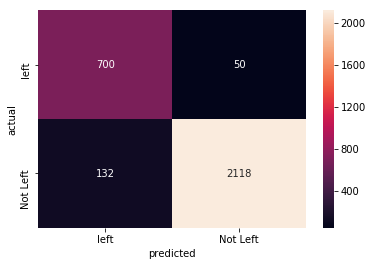

In [41]:
sn.heatmap(cm_v1, fmt="0.0f", xticklabels=['left', 'Not Left'], yticklabels=['left', 'Not Left'], annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')

In [43]:
knn_v1.predict_proba(x_test)[0:10]

array([[1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ]])

In [44]:
y_knn_v1['prob'] = knn_v1.predict_proba(x_test)[:,1]

In [47]:
y_knn_v1.sample(5)

,actual,predicted,prob
3831,0,0,0.0
5360,0,0,0.0
5612,0,0,0.0
13662,0,0,0.0
12670,1,1,1.0


In [85]:
y_knn_v1['new_Predict'] = y_knn_v1.prob.map(lambda x: 1 if x >= 0.2 else 0)

In [86]:
cm_v1_new = confusion_matrix(y_knn_v1.actual,y_knn_v1.new_Predict, [1,0])


Text(33.0, 0.5, 'actual')

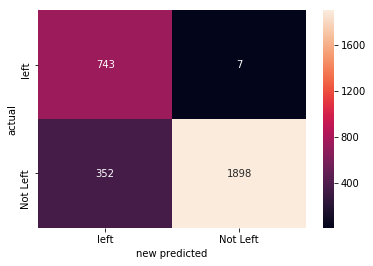

In [87]:
sn.heatmap(cm_v1_new, fmt="0.0f", xticklabels=['left', 'Not Left'], yticklabels=['left', 'Not Left'], annot=True)
plt.xlabel('new predicted')
plt.ylabel('actual')

### finding optimal cut off


In [88]:
FP_Cost = 1.0
FM_Cost = 3.0

In [89]:
def get_Cost(cutoff) :
    y_knn_v1['new_Predict'] = y_knn_v1.prob.map(lambda x: 1 if x >= cutoff else 0)
    cm_v1_new = confusion_matrix(y_knn_v1.actual,y_knn_v1.new_Predict, [1,0])
    return FP_Cost * cm_v1_new[1][0] + FM_Cost * cm_v1_new[0][1]

In [90]:
get_Cost(0.2)

373.0

In [91]:
import numpy as np

In [96]:
cutoff_list = np.arange(0.1,0.8,0.01)

In [97]:
cost_list = [get_Cost(x) for x in cutoff_list]

In [101]:
cost_df = pd.DataFrame({'cutoff' : cutoff_list,
                       'cost' : cost_list})


In [102]:
cost_df.sort_values('cost', ascending=True)[0:10]

,cutoff,cost
34,0.44,282.0
31,0.41,282.0
32,0.42,282.0
33,0.43,282.0
35,0.45,282.0
36,0.46,282.0
37,0.47,282.0
38,0.48,282.0
40,0.50,282.0
41,0.51,282.0


In [104]:
y_knn_v1['final_pred'] = y_knn_v1.prob.map(lambda x: 1 if x >= 0.44 else 0)

In [103]:
from sklearn.metrics import classification_report

In [106]:
print(classification_report(y_knn_v1.actual, y_knn_v1.final_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      2250
           1       0.84      0.93      0.88       750

   micro avg       0.94      0.94      0.94      3000
   macro avg       0.91      0.94      0.92      3000
weighted avg       0.94      0.94      0.94      3000



### Decision Tree

In [107]:
from sklearn.tree import DecisionTreeClassifier

In [108]:
tree_v1 = DecisionTreeClassifier(max_depth=5)

In [109]:
tree_v1.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [111]:
y_pred_tree_v1 = tree_v1.predict(x_test)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [113]:
cm_tree_v1 = confusion_matrix(y_test, y_pred_tree_v1, [1,0])

Text(33.0, 0.5, 'actual')

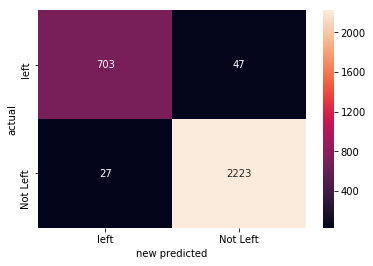

In [114]:
sn.heatmap(cm_tree_v1, fmt="0.0f", xticklabels=['left', 'Not Left'], yticklabels=['left', 'Not Left'], annot=True)
plt.xlabel('new predicted')
plt.ylabel('actual')

In [115]:
from sklearn.tree import export_graphviz

In [120]:
tree = export_graphviz(tree_v1, out_file='tree.odt',feature_names=x_features, class_names=['Not Left','Left'], filled=True)

In [121]:
import pydotplus as pdt

In [125]:
graph = pdt.graphviz.graph_from_dot_file('tree.odt')

In [126]:
graph.write_jpg('tree.jpg')

True

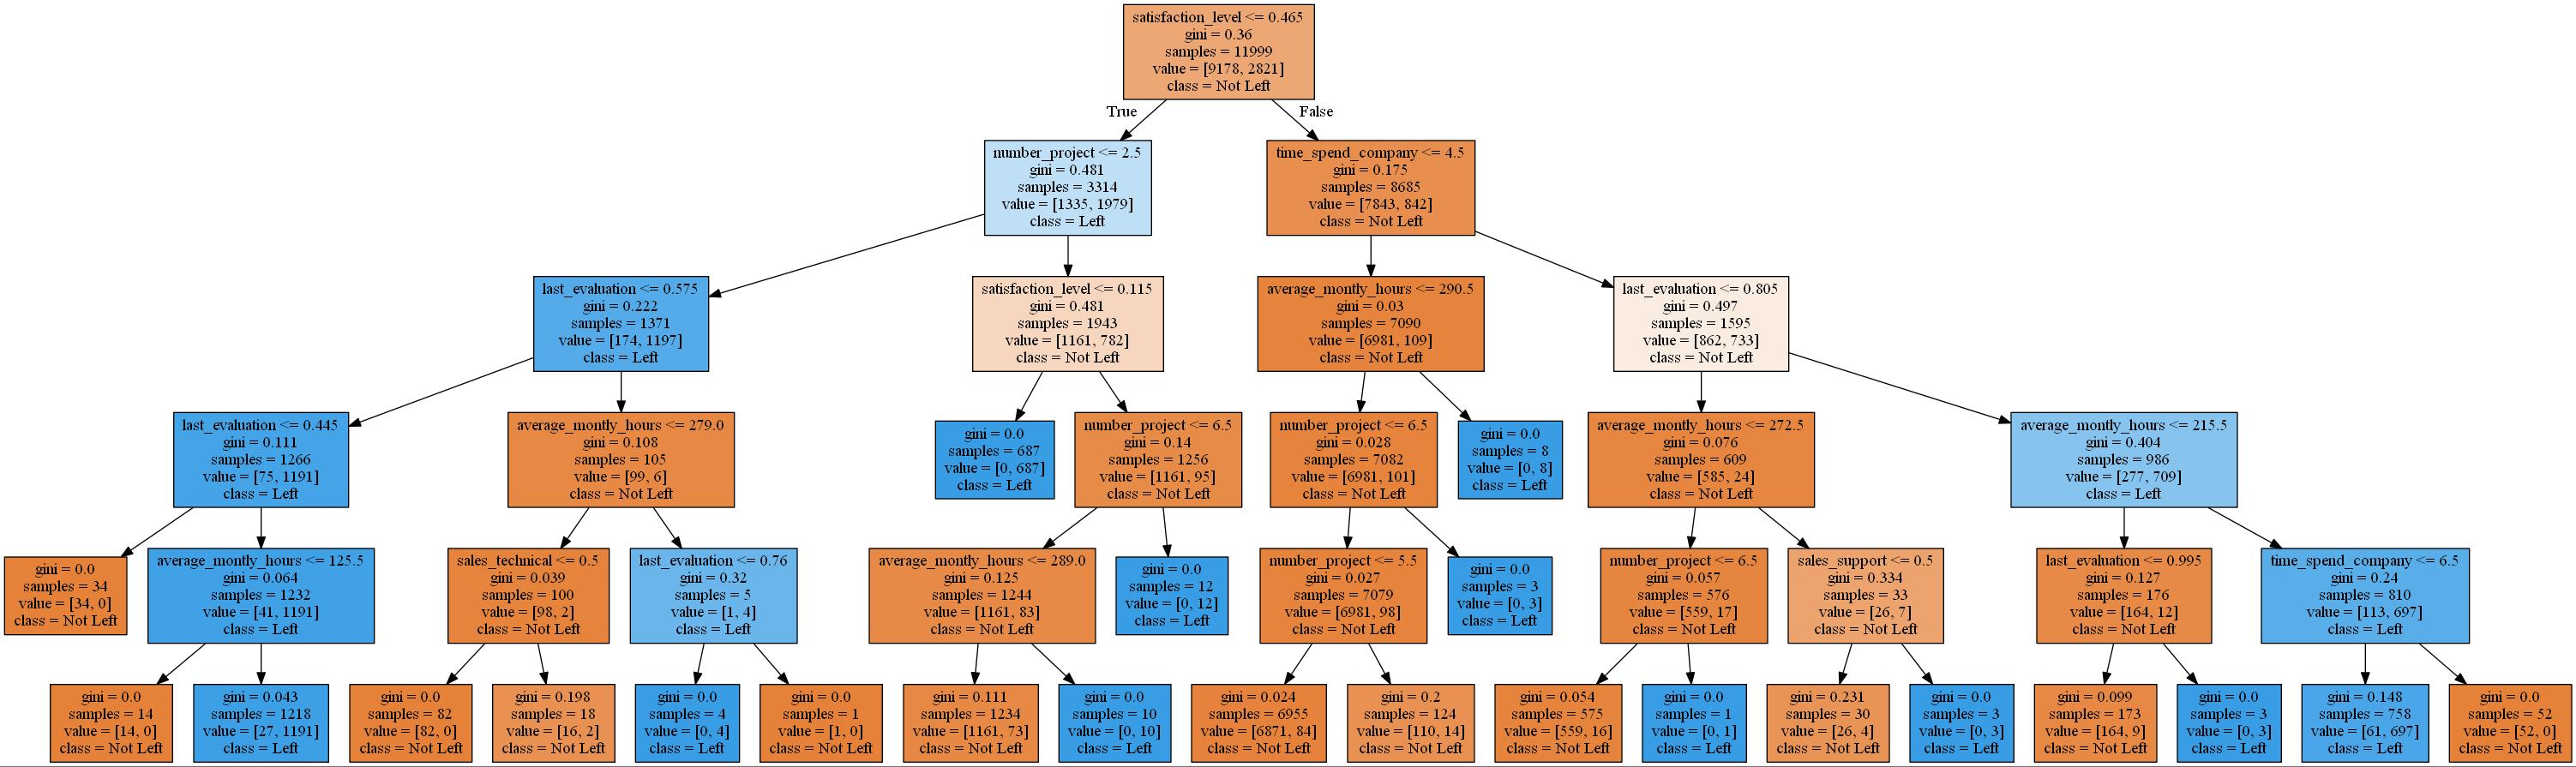

In [128]:
from IPython.display import Image
Image(filename='tree.jpg')

# Finding Model using grid Search


In [129]:
tree_v2 = DecisionTreeClassifier()

In [155]:
from sklearn.model_selection import GridSearchCV

In [168]:
tree_params = {'max_depth' : range(3,11),
               'criterion' : ['entropy','gini']}

In [169]:
tree_grid = GridSearchCV(tree_v2, param_grid=tree_params, cv=10, scoring='recall')

In [170]:
tree_grid.fit(x_train, y_train)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(3, 11), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [171]:
tree_grid.best_score_

0.9408007444555255

In [172]:
tree_grid.best_params_

{'criterion': 'gini', 'max_depth': 10}

In [173]:
tree_grid.best_estimator_


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [186]:
knn_v2 = KNeighborsClassifier()

In [187]:
DistanceMetric?


Object `DistanceMetric` not found.


In [188]:
knn_params = {'n_neighbors' : range(5,15),
               'metric' : ['euclidean','minkowski']}

In [189]:
knn_grid = GridSearchCV(knn_v2, param_grid=knn_params, cv=10, scoring='recall')

In [190]:
knn_grid.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': range(5, 15), 'metric': ['euclidean', 'minkowski']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [191]:
knn_grid.best_score_

0.9195358760411952

In [192]:
knn_grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 13}

In [193]:
knn_grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='uniform')